# Weddell Sea Passive Tracers

This notebook plot some simple examples of the evolution of passive tracers from the Weddell Sea AABW formation regions. 

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
#from celluloid import Camera
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cft
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from dask.distributed import Client

In [2]:
client = Client(n_workers=8)
client

Client Scheduler: tcp://127.0.0.1:43453 Dashboard: /proxy/8787/status,Cluster Workers: 8 Cores: 8 Memory: 34.36 GB


In [3]:
session = cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'

#### Load bathymetry information.

In [4]:
kmt = cc.querying.getvar(expt,'kmt',session, n=-1).fillna(1.0).astype(int) - 1
kmt.load()
ht = cc.querying.getvar(expt, 'ht', session,n=-1)

#### Loading last time frame from Weddell tracer.

In [19]:
weddell = cc.querying.getvar(expt,'passive_weddell' , session,frequency='1 monthly')
weddell = weddell.isel(time=-1)
weddell.load()
bottom_weddell = weddell.isel(st_ocean=kmt)
surface_weddell = weddell.isel(st_ocean=0)

#### Plot on south polar stereographic projection with circular cutout

In [6]:
# function to make boundary path
# make a path around boundary to create a sector map, then cut it out
def make_boundary_path(lons,lats):
    boundary_path = np.array([lons[-1,:],lats[-1,:]])
    boundary_path = np.append(boundary_path,np.array([lons[::-1,-1],lats[::-1,-1]]),axis=1)
    boundary_path = np.append(boundary_path,np.array([lons[1,::-1],lats[1,::-1]]),axis=1)
    boundary_path = np.append(boundary_path,np.array([lons[:,1],lats[:,1]]),axis=1)
    boundary_path = mpath.Path(np.swapaxes(boundary_path, 0, 1))
    return boundary_path

In [7]:
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', 
                                   edgecolor='black', facecolor='gray', linewidth=0.5)

#### Plotting surface and bottom tracers on map

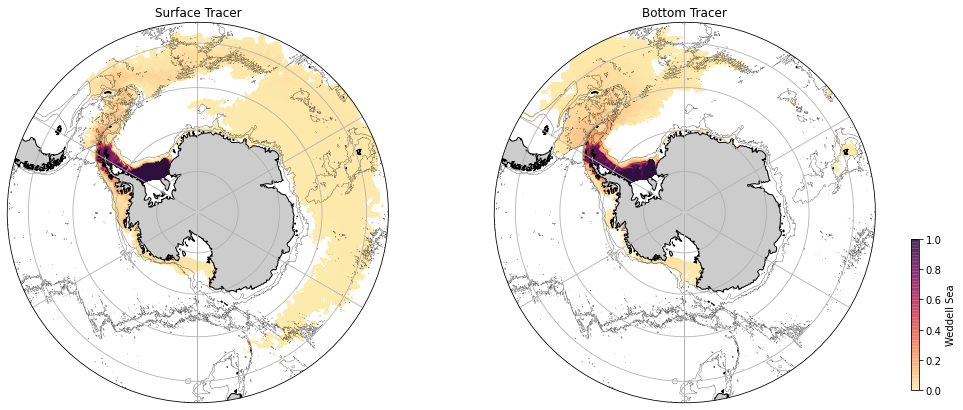

In [20]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(16, 7))
ax = plt.subplot(1, 2, 1, projection=projection)

ax.set_extent([-280, 80, -80, -45], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')
ax.gridlines()

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

p1w = surface_weddell.where(surface_weddell>0.01,np.NaN).plot(add_colorbar=False,vmin=0,vmax=1.0,alpha=0.5,cmap=cm.cm.matter,transform=ccrs.PlateCarree())
ht.plot.contour(levels=[1000, 3000],colors='k',linewidths=0.25,transform=ccrs.PlateCarree())
ax.set_title('Surface Tracer')

ax = plt.subplot(1, 2, 2, projection=projection)
ax.set_extent([-280, 80, -80, -45], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')
ax.gridlines()
ax.set_boundary(circle, transform=ax.transAxes)

p2w = bottom_weddell.where(bottom_weddell>0.01,np.NaN).plot(add_colorbar=False,vmin=0,vmax=1.0,alpha=0.5,cmap=cm.cm.matter,transform=ccrs.PlateCarree())
ht.plot.contour(levels=[1000, 3000],colors='k',linewidths=0.25,transform=ccrs.PlateCarree())
ax.set_title('Bottom Tracer')

ax_cb = plt.axes([0.92, 0.15, 0.007, 0.3])
cb = plt.colorbar(p2w,cax=ax_cb, orientation='vertical')
cb.set_label('Weddell Sea')

#plt.savefig('TracerConcentrationMap.png',dpi=250,facecolor='w')

### Re-do for a different time
Choose January from year 10 of tracer injection experiment (2160)

In [16]:
weddell = cc.querying.getvar(expt,'passive_weddell' , session,frequency='1 monthly')
weddell = weddell.sel(time='2160-01',method='nearest')
weddell.load()
bottom_weddell = weddell.isel(st_ocean=kmt)
surface_weddell = weddell.isel(st_ocean=0)

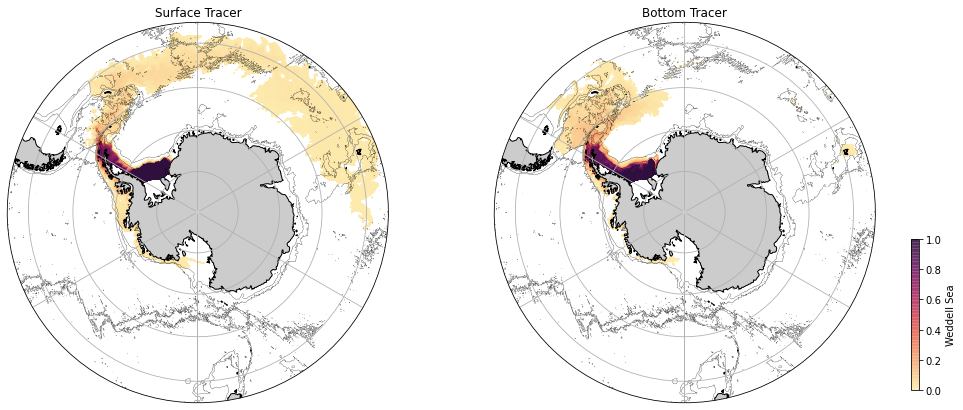

In [18]:
projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(16, 7))
ax = plt.subplot(1, 2, 1, projection=projection)

ax.set_extent([-280, 80, -80, -45], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')
ax.gridlines()

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

p1w = surface_weddell.where(surface_weddell>0.01,np.NaN).plot(add_colorbar=False,vmin=0,vmax=1.0,alpha=0.5,cmap=cm.cm.matter,transform=ccrs.PlateCarree())
ht.plot.contour(levels=[1000, 3000],colors='k',linewidths=0.25,transform=ccrs.PlateCarree())
ax.set_title('Surface Tracer')

ax = plt.subplot(1, 2, 2, projection=projection)
ax.set_extent([-280, 80, -80, -45], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')
ax.gridlines()
ax.set_boundary(circle, transform=ax.transAxes)

p2w = bottom_weddell.where(bottom_weddell>0.01,np.NaN).plot(add_colorbar=False,vmin=0,vmax=1.0,alpha=0.5,cmap=cm.cm.matter,transform=ccrs.PlateCarree())
ht.plot.contour(levels=[1000, 3000],colors='k',linewidths=0.25,transform=ccrs.PlateCarree())
ax.set_title('Bottom Tracer')

ax_cb = plt.axes([0.92, 0.15, 0.007, 0.3])
cb = plt.colorbar(p2w,cax=ax_cb, orientation='vertical')
cb.set_label('Weddell Sea')

#plt.savefig('TracerConcentrationMap.png',dpi=250,facecolor='w')

### Plot a few transects

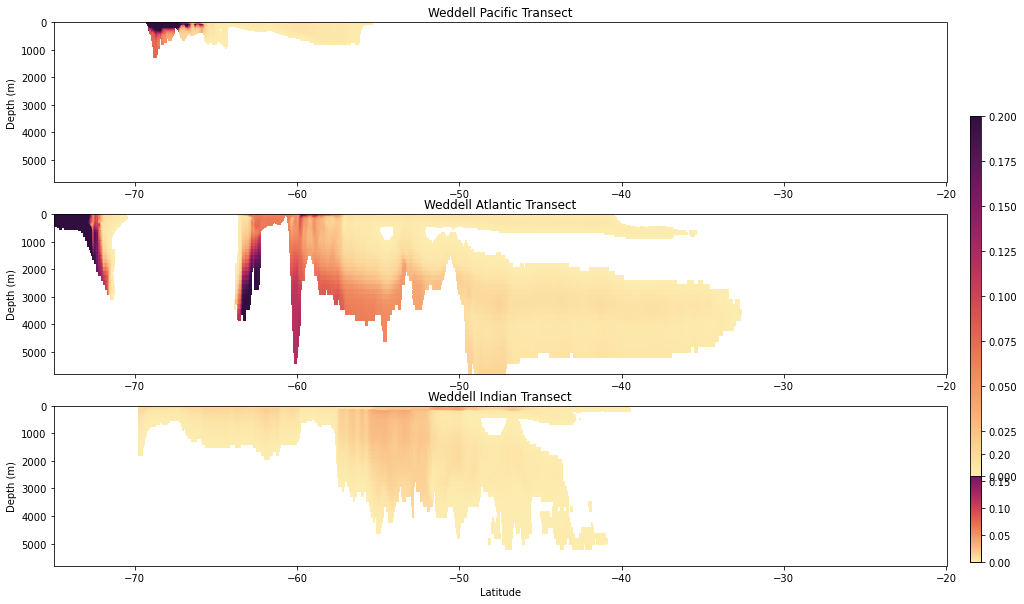

In [27]:
plt.figure(figsize=(16,10))

longitude = -70

plt.subplot(311)
pacific_weddell = weddell.sel(xt_ocean=longitude,method='nearest').sel(yt_ocean=slice(-75,-20))
ppw = pacific_weddell.where(pacific_weddell>0.001,np.NaN).plot(add_colorbar=False,vmin=0,vmax=0.2,cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Depth (m)')
plt.title('Weddell Pacific Transect')

ax_cb = plt.axes([0.92, 0.13, 0.01, 0.15])
cb = plt.colorbar(ppw,cax=ax_cb, orientation='vertical')

longitude = -45


plt.subplot(312)
atlantic_weddell = weddell.sel(xt_ocean=longitude,method='nearest').sel(yt_ocean=slice(-75,-20))
ppw = atlantic_weddell.where(atlantic_weddell>0.001,np.NaN).plot(add_colorbar=False,vmin=0,vmax=0.2,cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Depth (m)')
plt.title('Weddell Atlantic Transect')

ax_cb = plt.axes([0.92, 0.13, 0.01, 0.15])
cb = plt.colorbar(ppw,cax=ax_cb, orientation='vertical')


longitude = 20

plt.subplot(313)
indian_weddell = weddell.sel(xt_ocean=longitude,method='nearest').sel(yt_ocean=slice(-75,-20))
ppw = indian_weddell.where(indian_weddell>0.001,np.NaN).plot(add_colorbar=False,vmin=0,vmax=0.2,cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.title('Weddell Indian Transect')

ax_cb = plt.axes([0.92, 0.25, 0.01, 0.5])
cb = plt.colorbar(ppw,cax=ax_cb, orientation='vertical')

#plt.savefig('WeddellTracerTransects.png',dpi=250)

Text(0.5, 1.0, 'Timeseries at: (-72,-67.5,100)')

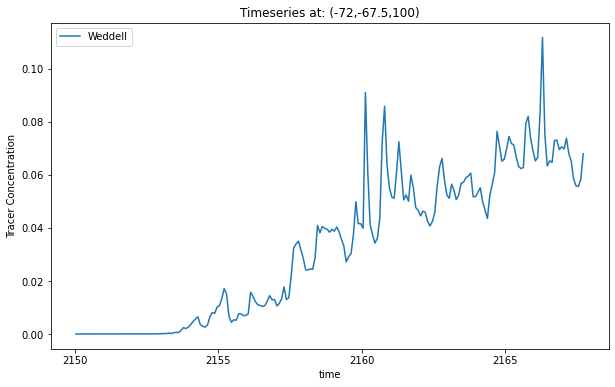

In [38]:
plt.figure(figsize=(10,6))

latitude = -67.5
longitude=-72
depth=100
start_time = '2150-01-01'

weddell = cc.querying.getvar(expt,'passive_weddell' , session,frequency='1 monthly',start_time=start_time)
weddell.sel(xt_ocean=longitude,method='nearest').sel(yt_ocean=latitude,method='nearest').sel(st_ocean=depth,method='nearest').plot(label='Weddell')


plt.legend()
plt.ylabel('Tracer Concentration')
plt.title('Timeseries at: ('+str(longitude)+','+str(latitude)+','+str(depth)+')')

#plt.savefig('TracerConcentrationTimeseries.png',dpi=250)